# LA Metro Lines Characterization

## Introduction

Driving in Los Angeles (LA) traffic could be a daunting task for tourists or people who are staying in LA for only a short while. Not only does LA have the worst traffic in the US (according to CBS news), but also confusing traffic layouts and road surfaces in dire disrepair. With LA being one of the host cities of World Cup 2026 and the host city of 2028 Olympics, it is clear that LA metro will be playing a major role in transporting tourists. 

Therefore, the characterization of the metro lines would be of great interest to tourists and local businesses alike. In this study, we are looking to characterize the metro lines by the venues surrounding the metro stations. For tourists, this study provides an idea of what venues to expect along the metro lines. For businesses, this study presents an opportunities to find a niche along the lines and avoid areas where competition is overly saturated. 

For this study, we will focus our efforts on studying the metro lines that pass through the city of LA, namely, the Red, the Gold and the Expo lines. 

## Data

In order to characterize the metro lines described previously, we will be using Four Square to collect list of venues and their categories for all metro stations along the Red, Gold and Expo lines. 

To do so, we'll first set up a function to loop through all metro stations to collect venue data from Four Square.  

In [1]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [11]:
#Set up Four Square credentials
CLIENT_ID = '#####' # your Foursquare ID
CLIENT_SECRET = '#####' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: #####
CLIENT_SECRET:#####


In [5]:
#define function to get venues

def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,            
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue ID',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

With the `getNearbyVenues` function defined, we then proceed to import data containing all coordinates data of all metro stations so that we can use the `getNearbyVenues`to loop through all metro stations and collect benue data from Four Square. 

In [6]:
#import Metro Station data
la_metro_stations = pd.read_csv('red_gold_expo_stns.csv')
la_metro_stations.head()

,StationName,Line,Latitude,Longitude
0,Atlantic Station,Gold,34.0334,-118.1540
1,East LA Civic Center Station,Gold,34.0332,-118.1614
2,Maravilla Station,Gold,34.0331,-118.1684
3,Indiana Station,Gold,34.0343,-118.1922
4,Soto Station,Gold,34.0440,-118.2106


Using the `read_csv` method, we imported the metro station data into a data frame. The data frame consists of each station's name, the line it belongs to, its latitidue and its longitude, respectively. The data appears to have been imported correctly. With that, use the `getNearbyVenues` to collect all venues in the proximity of the metro stations (within 400 meters radius). 

In [7]:
#get venues

metro_stn_venues = getNearbyVenues(names=la_metro_stations['StationName'],
                                   latitudes=la_metro_stations['Latitude'],
                                   longitudes=la_metro_stations['Longitude']
                                  )

print('Complete!')

Atlantic Station
East LA Civic Center Station
Maravilla Station
Indiana Station
Soto Station
Mariachi Plaza Station
Pico/Aliso Station
Little Tokyo/Arts District Station
Union Station Station
Chinatown Station
Lincoln/Cypress Station
Heritage Square Station
Southwest Museum Station
Highland Park Station
South Pasadena Station
Fillmore Station
Del Mar Station
Memorial Park Station
Lake Station
Allen Station
Sierra Madre Villa Station
Arcadia Station
Monrovia Station
Duarte/City of Hope Station
Irwindale Station
Azusa Downtown Station
APU/Citrus College Station
Civic Center/Grand Park Station
Pershing Square Station
7th Street/Metro Center Station
Westlake/MacArthur Park Station
Wilshire/Vermont Station
Vermont/Beverly Station
Vermont/Santa Monica Station
Vermont/Sunset Station
Hollywood/Western Station
Hollywood/Vine Station
Hollywood/Highland Station
Universal City/Studio City Station
North Hollywood Station
Pico Station
LATTC/Ortho Institute Station
Jefferson/USC Station
Expo Park/USC

With the quaries completed, let's insepct the data frame to see the data inside. 

In [8]:
metro_stn_venues.head()

,Station,Station Latitude,Station Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Atlantic Station,34.0334,-118.154,5397b842498ea56da1541a95,Tacos Ensenada,34.033560,-118.153599,Mexican Restaurant
1,Atlantic Station,34.0334,-118.154,4c37f8a83849c92844cebeb1,Bob's Freeze,34.032557,-118.154414,Ice Cream Shop
2,Atlantic Station,34.0334,-118.154,4ab55445f964a520fc7320e3,Los Molcajetes,34.032970,-118.155352,Latin American Restaurant
3,Atlantic Station,34.0334,-118.154,4b64c062f964a52048cd2ae3,Fish Taco Express,34.032529,-118.154530,Taco Place
4,Atlantic Station,34.0334,-118.154,4b83365ff964a520a1fd30e3,SUBWAY,34.032530,-118.153702,Sandwich Place


As shown above, the data set includes the ID, name, coordinates and categories of each vanue found as well as the station and its coordinates to which the venue is in close proximity to. With the geological data and labels, this data set allows us to see what is surrounding each metro station, and therefore able to characterize each station and metro line. 

Let's check to see how many venues are included in the data. 

In [10]:
metro_stn_venues.shape

(1379, 8)

With 1,379 venues found in the vacinity of metro stations of interest, we have the data to form the backbone of our analysis. 

## Methodology

To characterize the metro lines, the first thing to do is to visualize the overall geolocation data of all venues we have gathered in the previous section. To do so, we'll create a map centered in LA with all venues plotted as dots on the map to see the distribution of venues. 

In [14]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

34.0536909 -118.2427666


In [15]:
import folium # map rendering library

# create map of using latitude and longitude values
map_LA = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(metro_stn_venues['Venue Latitude'], metro_stn_venues['Venue Longitude'], metro_stn_venues['Station']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
    
map_LA

The map above shows venues around the metro line stations. Not surprisingly, it appears that stations located within the city of LA have venues more densely surrounding the metro stations. 

To further examine the data

### Recommended Station to Stop By

A typical tourist would likely want to stop by the stations with most venues close by. With our data, we can generate a list of top 20 stations with most venues close by. We can accomplish this by counting the venues for each station and sort by respective venue counts. As follows.

In [42]:
overall_venue_count = metro_stn_venues.groupby('Station').count()
overall_venue_count= overall_venue_count[['Station Latitude']]
overall_venue_count.rename(columns={'Station Latitude':'Overall Count'}, inplace=True)
overall_venue_count.sort_values(by = 'Overall Count', inplace=True, ascending=False)
overall_venue_count.reset_index()

linelist = la_metro_stations[['StationName','Line']]
linelist.rename(columns = {'StationName':'Station'}, inplace = True)
linelist

venue_count_ranked = overall_venue_count.merge(linelist, on='Station')
top20=venue_count_ranked.head(20)
top20

,Station,Overall Count,Line
0,Little Tokyo/Arts District Station,95,Gold
1,Pershing Square Station,89,Red
2,Memorial Park Station,67,Gold
3,Hollywood/Western Station,60,Red
4,Highland Park Station,49,Gold
5,Expo Park/USC Station,49,Expo
6,Del Mar Station,48,Gold
7,7th Street/Metro Center Station,48,Red/ Expo
8,Downtown Santa Monica Station,47,Expo
9,Hollywood/Vine Station,46,Red


As suggested by the data, the top 3 stations to stop by are:

1. Little Tokyo/Arts District Station
2. Pershing Square Station
3. Memorial Park Station

Indeed, a little research shows that Little Tokyo/Art District and Pershing Square, both close to downtown LA, are popular tourist spots with lots of attrations and food venues. The Memorial Park Station is located in the city of Pasadena. With Old Town Pasadena close to the station, it's not hard to see why there are many venues densely surround the station. 

### Battle of the Lines

So, Whcih line is the most exciting? 

To answer this question, let's rank the lines by how many stations they have in the top 10 list. 

In [49]:
top10=venue_count_ranked.head(10)

line_rank=top10.groupby('Line').count()
line_rank.sort_values('Overall Count', ascending= False, inplace=True)
line_rank.drop(columns='Station',inplace=True)
line_rank= line_rank.head(3)
#line_rank.plot(kind='bar')
line_rank

,Overall Count
Line,
Gold,4
Red,3
Expo,2


Text(0.5, 1.0, 'Rank of Metro Lines')

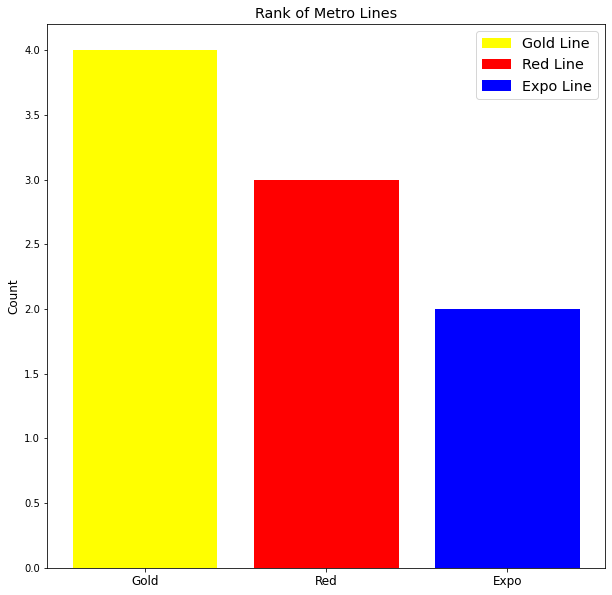

In [69]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

bar1= line_rank.loc['Gold']
bar2= line_rank.loc['Red']
bar3= line_rank.loc['Expo']
plt.bar(line_rank.index[0], bar1, color = 'yellow')
plt.bar(line_rank.index[1], bar2, color = 'red')
plt.bar(line_rank.index[2], bar3, color = 'blue')
plt.xticks(fontsize='large')
plt.legend(['Gold Line','Red Line','Expo Line'],loc=1, fontsize='x-large')
plt.ylabel('Count',fontsize='large')
plt.title('Rank of Metro Lines',fontsize='x-large')

As shown above, the Gold line apears to be the winner with 4 of it's stations in the top 10 list. Followed by the Red line with 3 stations in the top 10 and followed by the Expo line with 2 stations in the top 10 list. 

### Venue Categories

Let's shift our focus to the types of venues we find around the metro stations. To do so, we'll one-hot encode the category of venues. Then, we can obtain the top categories by summing the occurances of the encoded table vertically and sort through the list. We can then find out the top 20 occurances along the metro lines. 

In [70]:
# one hot encoding
metro_stn_onehot = pd.get_dummies(metro_stn_venues[['Venue Category']], prefix="", prefix_sep="")

# add station column back to dataframe
metro_stn_onehot['Station'] = metro_stn_venues['Station'] 

# move station column to the first column
fixed_columns = [metro_stn_onehot.columns[-1]] + list(metro_stn_onehot.columns[:-1])
metro_stn_onehot = metro_stn_onehot[fixed_columns]

metro_stn_onehot.head(5)

,Station,Accessories Store,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Yoshoku Restaurant
0,Atlantic Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Atlantic Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Atlantic Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Atlantic Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Atlantic Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# summing occurances vertically
metro_venue_grouped_sum = metro_stn_onehot.groupby('Station').sum().reset_index()
metro_venue_grouped_sum.head()

,Station,Accessories Store,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Yoshoku Restaurant
0,17th Street/Santa Monica College Station,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,26th Street/Bergamot Station,0,2,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0
2,7th Street/Metro Center Station,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,APU/Citrus College Station,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allen Station,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


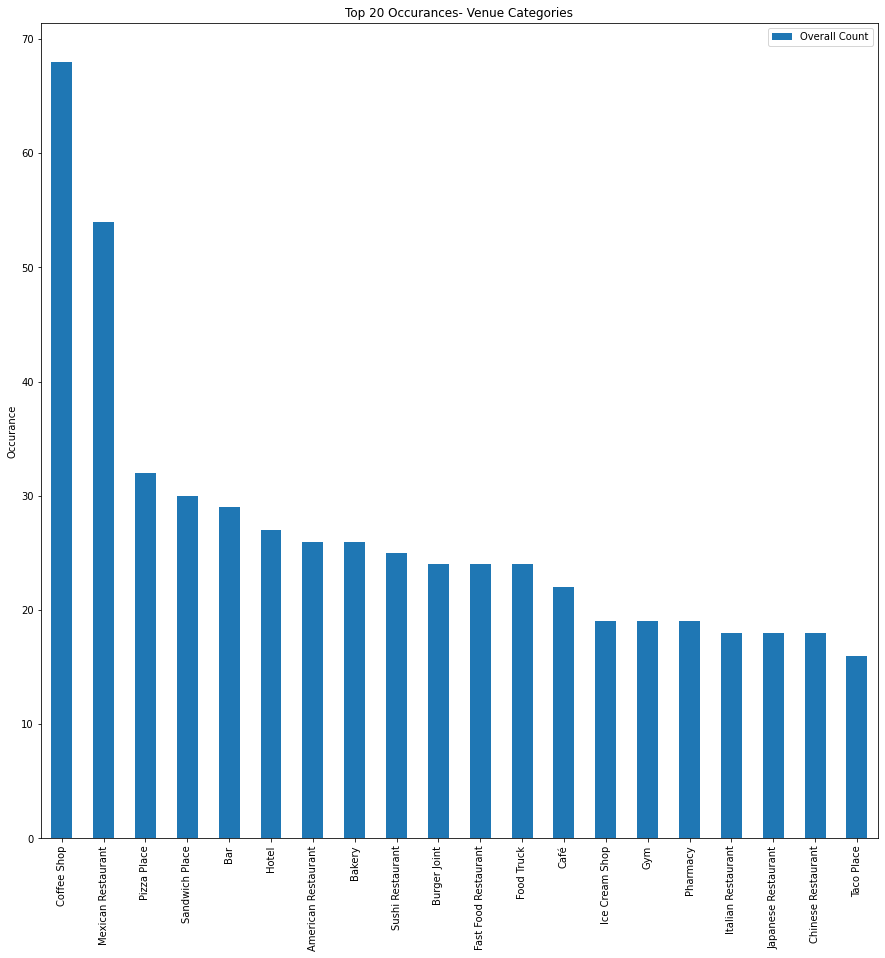

In [75]:
#overall most occurance
metro_venue_grouped_count = pd.DataFrame(metro_venue_grouped_sum.T.sum(axis=1))
metro_venue_grouped_count.columns=['Overall Count']
metro_venue_grouped_count.drop(['Station'], inplace=True)
metro_venue_grouped_count.sort_values('Overall Count', ascending=False, inplace=True)
top20_count_overall= metro_venue_grouped_count.head(20)
top20_count_overall.plot(kind='bar',
                        figsize=(15,15),
                         title='Top 20 Occurances- Venue Categories',
                        )

plt.ylabel('Occurance')

plt.show()

As shown in the graph above, you'll find plenty of coffee shops along the metro lines. The same applies to Mexican restaurants, pizza place and other top occurances. 

### Characterizing the Lines

Now that we know the most frequently encountered venues along the metro lines. We could then seek to categorize the lines by examining the distribution of each of the top 20 categories amongst the different lines. To do so, we group the venue occurances by line and then create a stacked bar graph with yellow, red and blue bars representing the Gold, Red and Expo lines, respectively. 

In [79]:
#add line data to the categories data
linelist = la_metro_stations[['StationName','Line']]
linelist.rename(columns = {'StationName':'Station'}, inplace = True)
linelist

metro_venue_grouped_sum
test = metro_venue_grouped_sum.merge(linelist, on='Station')
test.drop(columns='Station', inplace = True)

category_by_line = test.groupby('Line').sum()
category_by_line


/Users/garychou/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Accessories Store,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Yoshoku Restaurant
Line,,,,,,,,,,,,,,,,,,,,,
Expo,1,11,1,0,1,2,0,4,0,1,...,0,1,0,0,1,0,0,1,1,0
Gold,0,9,0,1,0,0,0,4,1,3,...,0,3,3,1,0,1,1,0,1,1
Gold/ Red,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Red,0,6,0,0,0,0,1,5,2,1,...,1,0,0,0,2,0,0,0,1,0
Red/ Expo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
top20= top20_count_overall.index
top20_by_line= category_by_line[top20]
top20_by_line

,Coffee Shop,Mexican Restaurant,Pizza Place,Sandwich Place,Bar,Hotel,American Restaurant,Bakery,Sushi Restaurant,Burger Joint,Fast Food Restaurant,Food Truck,Café,Ice Cream Shop,Gym,Pharmacy,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Taco Place
Line,,,,,,,,,,,,,,,,,,,,
Expo,19,11,10,5,5,2,11,3,4,6,8,11,6,4,7,7,4,1,2,2
Gold,26,33,16,11,14,8,9,18,17,10,7,6,9,11,8,3,6,13,8,9
Gold/ Red,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Red,20,8,6,13,9,15,6,4,1,6,8,7,7,4,2,9,6,3,8,5
Red/ Expo,3,0,0,1,1,2,0,0,3,2,1,0,0,0,2,0,2,1,0,0


Text(0.5, 1.0, 'Top 20 Venues Occurances by Line')

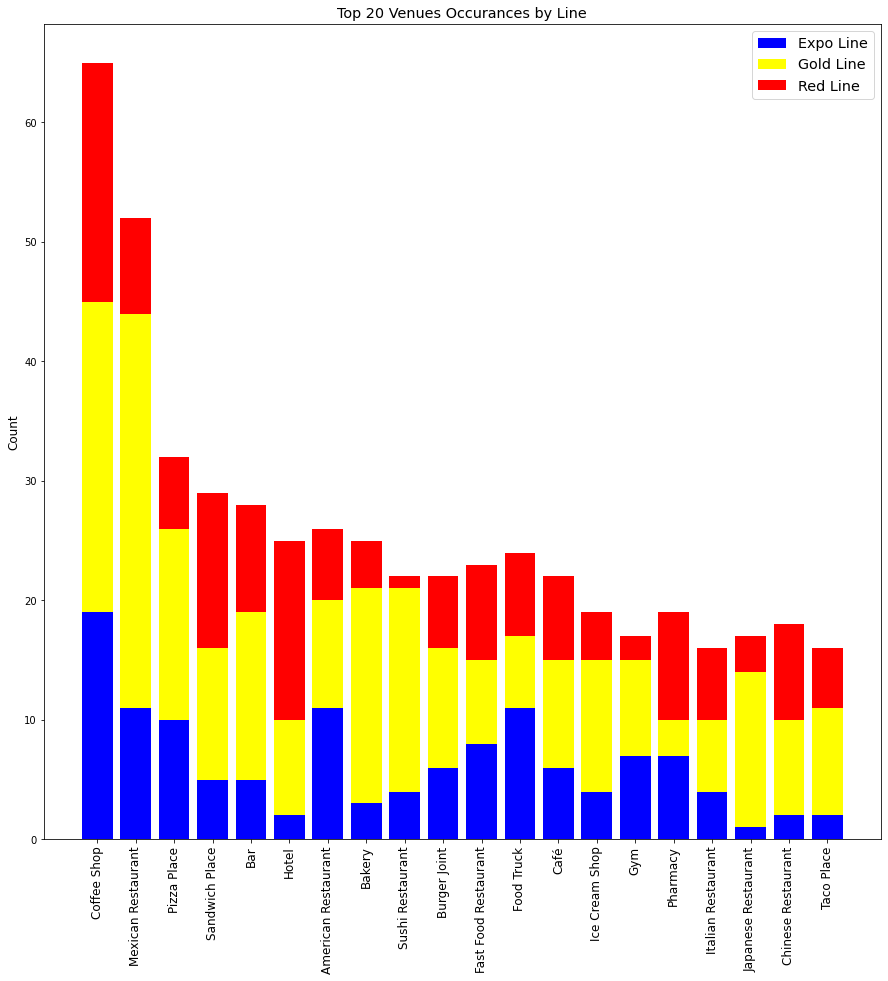

In [78]:
plt.figure(figsize=(15,15))

bar1= top20_by_line.loc['Expo']
bar2= top20_by_line.loc['Gold']
bar3= top20_by_line.loc['Red']
plt.bar(top20_by_line.columns, bar1, color = 'blue')
plt.bar(top20_by_line.columns, bar2, color = 'yellow', bottom=bar1)
plt.bar(top20_by_line.columns, bar3, color = 'red', bottom=bar1+bar2)
plt.xticks(rotation=90, fontsize='large')
plt.legend(['Expo Line','Gold Line','Red Line'],loc=1, fontsize='x-large')
plt.ylabel('Count',fontsize='large')
plt.title('Top 20 Venues Occurances by Line',fontsize='x-large')

A few points are observed based on the graph shown above:
1. Large portion of Mexican restaurants are concentrated along the Gold line stations. For tourists seeking Mexican food, the gold line would offer great selection. On the contrary, stations along the Gold line are where competition is most fierce for restaurant owners looking to open a Mexican restaurant. 
2. For tourists looking to find accomodation, accomodation is most likely to be found along the red line as a large portion of all hotels are located along the red line. Given the lack of sushi restaurants on the red line, there's an opportunity for restaurateurs to open a sushi restaurant along the red line. 
3. For tourists looking for great American restaurants and food trucks, the Expo line offers great selections. On the other hand, if you're looking for hotel to stay, it would be better to look else where than the Expo line. 
    

### K-Means Clustering

With the data thoroughly examined, we turn our attention to seeking additional insight with machine learning. Namely, we will utilize k-means clustering to divide the metro stations into different groups. 

To carry out k-means clustering on the metro stations, we first import the `Kmeans` library from scikit-learn, we then set clusters to 5 and proceed to fit the model. As a result, the `Kmeans` model produces an array of labels for all metro stations.   

In [80]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

metro_venue_grouped_clustering = metro_venue_grouped_sum.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(metro_venue_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

To help differentiate the difference between labels, we'll create a data frame of top 10 most common values for each station. Then add the kmeans labels to the data frame to complete the picture. 

In [84]:
#define function to return most common values
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Station'] = metro_venue_grouped_sum['Station']

for ind in np.arange(metro_venue_grouped_sum.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(metro_venue_grouped_sum.iloc[ind, :], num_top_venues)

station_venues_sorted.head()


,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17th Street/Santa Monica College Station,Park,Art Gallery,Tennis Court,Performing Arts Venue,Skate Park,Coffee Shop,Supermarket,New American Restaurant,Convenience Store,Cycle Studio
1,26th Street/Bergamot Station,Coffee Shop,Food Truck,Art Gallery,American Restaurant,Gym,Asian Restaurant,Gas Station,Steakhouse,Café,Supermarket
2,7th Street/Metro Center Station,New American Restaurant,Sushi Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Salad Place,Italian Restaurant,Lounge,Seafood Restaurant,Hotel,Burger Joint
3,APU/Citrus College Station,Light Rail Station,Theater,General Entertainment,Gift Shop,Café,Coffee Shop,Flower Shop,Filipino Restaurant,Fish & Chips Shop,Yoshoku Restaurant
4,Allen Station,American Restaurant,Taco Place,Automotive Shop,Fast Food Restaurant,Grocery Store,Italian Restaurant,Café,Convenience Store,Mexican Restaurant,Light Rail Station


Next, we'll visualize the distribution of metro stations with different labels on the map. To do so, we'll add the geophysical information of each metro station into the data frame just created. A map can then be created with stations of different labels plotted in different colors.  

In [94]:

# add clustering labels

station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
la_metro_merged = la_metro_stations
la_metro_merged.rename(columns={'StationName':'Station'}, inplace=True)
# add latitude/longitude for each station
la_metro_merged = la_metro_merged.join(station_venues_sorted.set_index('Station'), on='Station')

la_metro_merged.head() # check the last columns!

,Station,Line,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic Station,Gold,34.0334,-118.1540,3,Gas Station,Latin American Restaurant,Mexican Restaurant,Taco Place,Flower Shop,Ice Cream Shop,Sandwich Place,Convenience Store,Bar,Food & Drink Shop
1,East LA Civic Center Station,Gold,34.0332,-118.1614,3,Mexican Restaurant,Food,Southern / Soul Food Restaurant,Coffee Shop,Fast Food Restaurant,Yoshoku Restaurant,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Truck
2,Maravilla Station,Gold,34.0331,-118.1684,3,Intersection,Food,Taco Place,Liquor Store,Pedestrian Plaza,Yoshoku Restaurant,Falafel Restaurant,French Restaurant,Food Truck,Food Court
3,Indiana Station,Gold,34.0343,-118.1922,3,Mexican Restaurant,Convenience Store,Ice Cream Shop,Bakery,Shopping Mall,Fast Food Restaurant,Pizza Place,Shoe Store,Burger Joint,Flower Shop
4,Soto Station,Gold,34.0440,-118.2106,3,Food Truck,Mexican Restaurant,Japanese Restaurant,Grocery Store,Bank,Chinese Restaurant,Train Station,Sushi Restaurant,Theater,Donut Shop


In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_metro_merged['Latitude'], la_metro_merged['Longitude'], la_metro_merged['Station'], la_metro_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

To make sense of the map, following tables are created to zoom into each different lables. First, the table of stations label "0" and their top 10 most common venues (shown in red on the map). 

In [96]:
la_metro_merged.loc[la_metro_merged['Cluster Labels'] == 0, la_metro_merged.columns[[0] + list(range(5, la_metro_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Highland Park Station,Bakery,Mexican Restaurant,Pizza Place,Café,Coffee Shop,Mediterranean Restaurant,Bar,Juice Bar,Art Gallery,Bowling Alley
16,Del Mar Station,Coffee Shop,Bar,Sushi Restaurant,Arts & Crafts Store,Bakery,American Restaurant,Shoe Store,Food Truck,Cosmetics Shop,Light Rail Station
17,Memorial Park Station,Coffee Shop,American Restaurant,Mexican Restaurant,Sushi Restaurant,Clothing Store,Dessert Shop,Ice Cream Shop,Sandwich Place,Furniture / Home Store,Gift Shop
28,Pershing Square Station,French Restaurant,Coffee Shop,Bar,Italian Restaurant,Sandwich Place,Building,Seafood Restaurant,Café,Mexican Restaurant,Music Venue
29,7th Street/Metro Center Station,New American Restaurant,Sushi Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Salad Place,Italian Restaurant,Lounge,Seafood Restaurant,Hotel,Burger Joint
36,Hollywood/Vine Station,Hotel,Coffee Shop,Lounge,Bar,Cocktail Bar,Nightclub,Japanese Restaurant,Burger Joint,Concert Hall,Grocery Store
40,Pico Station,Coffee Shop,Food Truck,Bar,Sports Bar,Basketball Court,Mexican Restaurant,Shoe Store,Marijuana Dispensary,Boutique,Steakhouse
57,Downtown Santa Monica Station,American Restaurant,Clothing Store,Furniture / Home Store,Italian Restaurant,Sporting Goods Shop,Steakhouse,Mexican Restaurant,Toy / Game Store,Café,Bar


Next, the Hollywood/Western Station is labelled group 1 and is plotted in purple on the map.

In [97]:
la_metro_merged.loc[la_metro_merged['Cluster Labels'] == 1, la_metro_merged.columns[[0] + list(range(5, la_metro_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Hollywood/Western Station,Thai Restaurant,Sandwich Place,Coffee Shop,Pharmacy,Ice Cream Shop,Hotel,Supermarket,Mobile Phone Shop,Bank,Cosmetics Shop


Next, the Expo Park/USC Station is labelled group 2 and is plotted in cyan on the map.

In [98]:
la_metro_merged.loc[la_metro_merged['Cluster Labels'] == 2, la_metro_merged.columns[[0] + list(range(5, la_metro_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Expo Park/USC Station,Science Museum,Museum,History Museum,Mexican Restaurant,Fast Food Restaurant,Food Court,Aquarium,Coffee Shop,Movie Theater,Sandwich Place


Next, we see from table below that the majority of metro stations falls under the label 3 and has no distingushing features from one another. They are shown on the map as teal dots. 

In [99]:
la_metro_merged.loc[la_metro_merged['Cluster Labels'] == 3, la_metro_merged.columns[[0] + list(range(5, la_metro_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic Station,Gas Station,Latin American Restaurant,Mexican Restaurant,Taco Place,Flower Shop,Ice Cream Shop,Sandwich Place,Convenience Store,Bar,Food & Drink Shop
1,East LA Civic Center Station,Mexican Restaurant,Food,Southern / Soul Food Restaurant,Coffee Shop,Fast Food Restaurant,Yoshoku Restaurant,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Truck
2,Maravilla Station,Intersection,Food,Taco Place,Liquor Store,Pedestrian Plaza,Yoshoku Restaurant,Falafel Restaurant,French Restaurant,Food Truck,Food Court
3,Indiana Station,Mexican Restaurant,Convenience Store,Ice Cream Shop,Bakery,Shopping Mall,Fast Food Restaurant,Pizza Place,Shoe Store,Burger Joint,Flower Shop
4,Soto Station,Food Truck,Mexican Restaurant,Japanese Restaurant,Grocery Store,Bank,Chinese Restaurant,Train Station,Sushi Restaurant,Theater,Donut Shop
5,Mariachi Plaza Station,Mexican Restaurant,Bookstore,Plaza,Bar,Asian Restaurant,Ice Cream Shop,Burger Joint,Bakery,Food Truck,Food Court
6,Pico/Aliso Station,Art Gallery,Light Rail Station,Pizza Place,Food,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Yoshoku Restaurant,Falafel Restaurant
8,Union Station Station,Mexican Restaurant,Pedestrian Plaza,Plaza,Bakery,Historic Site,Train Station,Brewery,Dive Bar,Discount Store,Fried Chicken Joint
9,Chinatown Station,Chinese Restaurant,Bakery,Vietnamese Restaurant,Bar,Café,Burger Joint,Grocery Store,Coffee Shop,Monument / Landmark,Brewery
10,Lincoln/Cypress Station,Taco Place,Park,Dance Studio,Light Rail Station,Bar,Donut Shop,Fast Food Restaurant,Intersection,Breakfast Spot,Food Court


Lastly, Little Tokyo/Arts District station is labeled as group 4 and is shown on the map as an orange dot. 

In [100]:
la_metro_merged.loc[la_metro_merged['Cluster Labels'] == 4, la_metro_merged.columns[[0] + list(range(5, la_metro_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Little Tokyo/Arts District Station,Japanese Restaurant,Sushi Restaurant,Ramen Restaurant,Ice Cream Shop,Gift Shop,Coffee Shop,Bubble Tea Shop,Boutique,Shopping Mall,Bar


Based on the map and the data above, we can conclude as such:

1. The majority of the metro stations falls under the group labelled 3, plotted as teal dots on the map, and has no distingushing features from one another. These are not particularly interesting places for tourists to visit. 
2. Stations labelled "0" are among city centers and have an abundance of venues nearby. These are recommended stations for tourists to stop by.
3. Lastly, we have 3 metro stations being singled out by the k-means algorithm. There are our top recommended stations to tourists each with strong distinguishing characteristics. Namely, the Hollywood/Western Station (purple), the Expo Park/USC Station (cyan) and Little Tokyo/Arts District station (orange).